In [1]:
import pandas as pd
import keras
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df_raw = pd.read_csv('/content/data_phdosado.csv', index_col=1, engine='python', on_bad_lines='skip') # Colab
#df = pd.read_csv('../data/data_phdosado.csv', index_col=1) # Local

In [3]:
# Check for nulls
df_raw.isnull().sum()

,0
ID,0
Real_RD_PV_pHDosado,4
Real_RD_MV_ValvulaCalpHDosado,4
Real_RD_PV_VazaoDosado,3
Real_RD_ST_LimpezaPHmetro,4
Real_RD_PV_BaumeCal,4
Real_RD_PV_PressaoLinhaCal,4
Real_RD_MV_ValvulaCalpHDosado-2,4
Real_RD_MV_PressaoLinhaCal,2
Real_RD_PV_NivelTqCal,4


In [4]:
list(df_raw.columns)

['ID',
 'Real_RD_PV_pHDosado',
 'Real_RD_MV_ValvulaCalpHDosado',
 'Real_RD_PV_VazaoDosado',
 'Real_RD_ST_LimpezaPHmetro',
 'Real_RD_PV_BaumeCal',
 'Real_RD_PV_PressaoLinhaCal',
 'Real_RD_MV_ValvulaCalpHDosado-2',
 'Real_RD_MV_PressaoLinhaCal',
 'Real_RD_PV_NivelTqCal',
 'Real_RD_PV_NivelTqDosado']

In [5]:
df_raw.head()


,ID,Real_RD_PV_pHDosado,Real_RD_MV_ValvulaCalpHDosado,Real_RD_PV_VazaoDosado,Real_RD_ST_LimpezaPHmetro,Real_RD_PV_BaumeCal,Real_RD_PV_PressaoLinhaCal,Real_RD_MV_ValvulaCalpHDosado-2,Real_RD_MV_PressaoLinhaCal,Real_RD_PV_NivelTqCal,Real_RD_PV_NivelTqDosado
timezone,,,,,,,,,,,
2024-07-13 14:28:22,393652,7.1260,37.128124,899.625,0.0,20.454374,0.798437,37.128124,74.546875,98.31250,73.84375
2024-07-13 14:28:25,393653,7.1225,37.178123,899.625,0.0,20.454374,0.798437,37.178123,74.578125,98.34375,73.87500
2024-07-13 14:28:28,393654,7.1225,37.187500,899.625,0.0,20.454374,0.796875,37.187500,74.559375,98.40625,73.87500
2024-07-13 14:28:31,393655,7.1260,37.331249,899.625,0.0,20.454374,0.798437,37.331249,74.596875,98.50000,73.84375
2024-07-13 14:28:34,393656,7.1225,37.218750,900.375,0.0,20.454374,0.798437,37.218750,74.562500,98.25000,73.87500


## Pré-processamento

In [6]:
minute = 20 # Observações por minuto
hour = minute * 60
day = hour * 24

In [7]:
df = df_raw.dropna() # Drop nulls
df = df.tail(day * 10) # Seleciona apenas os últimos dez dias
df = df.drop(columns=['ID', 'Real_RD_PV_BaumeCal', 'Real_RD_MV_ValvulaCalpHDosado-2']) # Features não usadas
df.head()

,Real_RD_PV_pHDosado,Real_RD_MV_ValvulaCalpHDosado,Real_RD_PV_VazaoDosado,Real_RD_ST_LimpezaPHmetro,Real_RD_PV_PressaoLinhaCal,Real_RD_MV_PressaoLinhaCal,Real_RD_PV_NivelTqCal,Real_RD_PV_NivelTqDosado
timezone,,,,,,,,
2024-07-13 14:28:22,7.1260,37.128124,899.625,0.0,0.798437,74.546875,98.31250,73.84375
2024-07-13 14:28:25,7.1225,37.178123,899.625,0.0,0.798437,74.578125,98.34375,73.87500
2024-07-13 14:28:28,7.1225,37.187500,899.625,0.0,0.796875,74.559375,98.40625,73.87500
2024-07-13 14:28:31,7.1260,37.331249,899.625,0.0,0.798437,74.596875,98.50000,73.84375
2024-07-13 14:28:34,7.1225,37.218750,900.375,0.0,0.798437,74.562500,98.25000,73.87500


In [8]:
# Normalização
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

In [9]:
# Porcentagem usada para treinar o modelo
split_fraction = 0.715
train_split = int(split_fraction * int(df.shape[0]))

learning_rate = 0.001
batch_size = 256
epochs = 10

In [10]:
train_data = normalized_df.loc[0 : train_split - 1]
val_data = normalized_df.loc[train_split:]

In [11]:
normalized_df

,Real_RD_PV_pHDosado,Real_RD_MV_ValvulaCalpHDosado,Real_RD_PV_VazaoDosado,Real_RD_ST_LimpezaPHmetro,Real_RD_PV_PressaoLinhaCal,Real_RD_MV_PressaoLinhaCal,Real_RD_PV_NivelTqCal,Real_RD_PV_NivelTqDosado
0,0.543689,0.311573,0.529847,0.0,0.459186,0.202730,0.861982,0.698335
1,0.542476,0.312292,0.529847,0.0,0.459186,0.204006,0.863078,0.698669
2,0.542476,0.312427,0.529847,0.0,0.456778,0.203241,0.865271,0.698669
3,0.543689,0.314495,0.529847,0.0,0.459186,0.204772,0.868560,0.698335
4,0.542476,0.312877,0.530984,0.0,0.459186,0.203368,0.859790,0.698669
...,...,...,...,...,...,...,...,...
57338,0.691748,0.289542,0.980102,0.0,0.461594,0.416943,0.767814,0.321220
57339,0.694175,0.289452,0.981239,0.0,0.459186,0.417964,0.759044,0.320886
57340,0.694175,0.288733,0.985219,0.0,0.456778,0.418219,0.765622,0.321220
57341,0.694175,0.289677,0.989198,0.0,0.461594,0.417709,0.762333,0.321554


### Dataset de treinamento

In [12]:
# Usaremos os dados da última hora para prever 5 minutos
past = hour
future = minute * 5
step = 1

# Dataset de treinamento
start = past + future
end = start + train_split

x_train = train_data.drop(columns=['Real_RD_PV_pHDosado']).values
y_train = normalized_df['Real_RD_PV_pHDosado'][start:end]

sequence_length = int(past / step)

In [13]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [14]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (41000, 7)
y_train shape: (41000,)


In [15]:
for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (256, 1200, 7)
Target shape: (256,)


### Dataset de validação

In [16]:
# Dataset de validação
x_end = len(val_data) - past - future
label_start = train_split + past + future

x_val = val_data.drop(columns=['Real_RD_PV_pHDosado']).iloc[:x_end].values
y_val = normalized_df['Real_RD_PV_pHDosado'][label_start:].values

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [17]:
print(f"x_val shape: {x_val.shape}")
print(f"y_val shape: {y_val.shape}")

x_val shape: (15043, 7)
y_val shape: (15043,)


# Treinamento

## LSTM

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2])))
model.add(keras.layers.LSTM(32))
model.add(keras.layers.Dense(1))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mae")
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 32)                  │           5,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,281 (20.63 KB)

 Trainable params: 5,281 (20.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
path_checkpoint = "model_checkpoint.weights.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/10
799/800 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0558
Epoch 1: val_loss improved from inf to 0.07801, saving model to model_checkpoint.weights.h5
800/800 ━━━━━━━━━━━━━━━━━━━━ 81s 100ms/step - loss: 0.0558 - val_loss: 0.0780
Epoch 2/10
799/800 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0415
Epoch 2: val_loss improved from 0.07801 to 0.07490, saving model to model_checkpoint.weights.h5
800/800 ━━━━━━━━━━━━━━━━━━━━ 82s 102ms/step - loss: 0.0415 - val_loss: 0.0749
Epoch 3/10
799/800 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0399
Epoch 3: val_loss did not improve from 0.07490
800/800 ━━━━━━━━━━━━━━━━━━━━ 83s 104ms/step - loss: 0.0400 - val_loss: 0.0758
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0390
Epoch 4: val_loss improved from 0.07490 to 0.07195, saving model to model_checkpoint.weights.h5
800/800 ━━━━━━━━━━━━━━━━━━━━ 84s 105ms/step - loss: 0.0391 - val_loss: 0.0719
Epoch 5/10
799/800 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0381
Epoch 5: val_loss

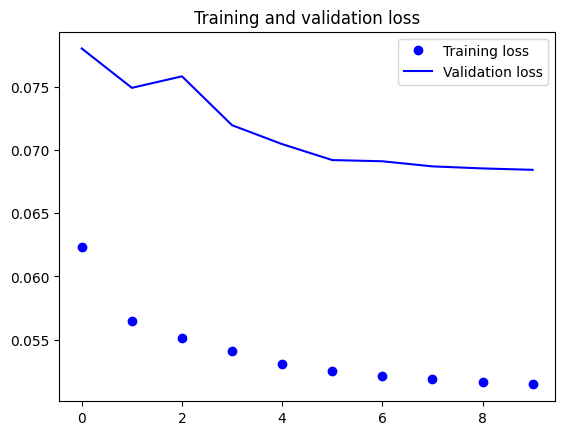

In [ ]:
def plot_history(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plot_epochs = range(len(loss))

  plt.figure()

  plt.plot(plot_epochs, loss, 'bo', label='Training loss')
  plt.plot(plot_epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

plot_history(history)


## Camada LSTM com dropout

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2])))
model.add(keras.layers.LSTM(32,
                           dropout=0.2,
                           recurrent_dropout=0.2,
                           ))
model.add(keras.layers.Dense(1))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mae")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 32)                  │           5,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,153 (20.13 KB)

 Trainable params: 5,153 (20.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
path_checkpoint = "model_checkpoint.weights.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.4058
Epoch 1: val_loss improved from inf to 0.03673, saving model to model_checkpoint.weights.h5
44/44 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - loss: 0.4023 - val_loss: 0.0367
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.1123
Epoch 2: val_loss improved from 0.03673 to 0.02989, saving model to model_checkpoint.weights.h5
44/44 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - loss: 0.1120 - val_loss: 0.0299
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.0970
Epoch 3: val_loss did not improve from 0.02989
44/44 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - loss: 0.0968 - val_loss: 0.0315
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.0886
Epoch 4: val_loss did not improve from 0.02989
44/44 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - loss: 0.0884 - val_loss: 0.0357
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.0837
Epoch 5: val_loss did not improve from 0.02989
44/44 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - loss: 0.0835 - val

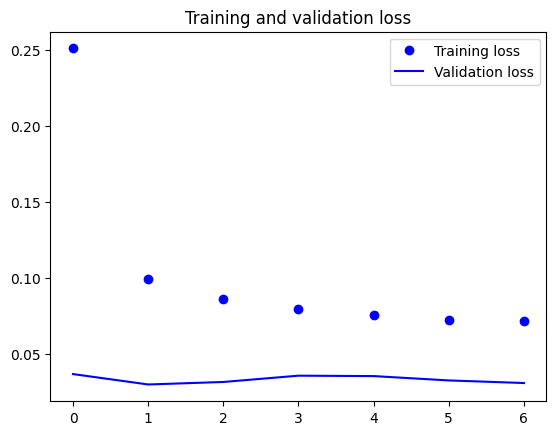

In [ ]:
def plot_history(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plot_epochs = range(len(loss))

  plt.figure()

  plt.plot(plot_epochs, loss, 'bo', label='Training loss')
  plt.plot(plot_epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

plot_history(history)

##Sem earlystop

In [18]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2])))
model.add(keras.layers.LSTM(32,
                           dropout=0.2,
                           recurrent_dropout=0.2,
                           ))
model.add(keras.layers.Dense(1))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mae")
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 32)                  │           5,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,153 (20.13 KB)

 Trainable params: 5,153 (20.13 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
path_checkpoint = "model_checkpoint.weights.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[modelckpt_callback],
)

Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.1743
Epoch 1: val_loss improved from inf to 0.07397, saving model to model_checkpoint.weights.h5
156/156 ━━━━━━━━━━━━━━━━━━━━ 271s 2s/step - loss: 0.1738 - val_loss: 0.0740
Epoch 2/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.0565
Epoch 2: val_loss improved from 0.07397 to 0.07388, saving model to model_checkpoint.weights.h5
156/156 ━━━━━━━━━━━━━━━━━━━━ 268s 2s/step - loss: 0.0565 - val_loss: 0.0739
Epoch 3/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.0526
Epoch 3: val_loss improved from 0.07388 to 0.06432, saving model to model_checkpoint.weights.h5
156/156 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - loss: 0.0526 - val_loss: 0.0643
Epoch 4/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - loss: 0.0498
Epoch 4: val_loss improved from 0.06432 to 0.06287, saving model to model_checkpoint.weights.h5
156/156 ━━━━━━━━━━━━━━━━━━━━ 268s 2s/step - loss: 0.0498 - val_loss: 0.0629
Epoch 5/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step -

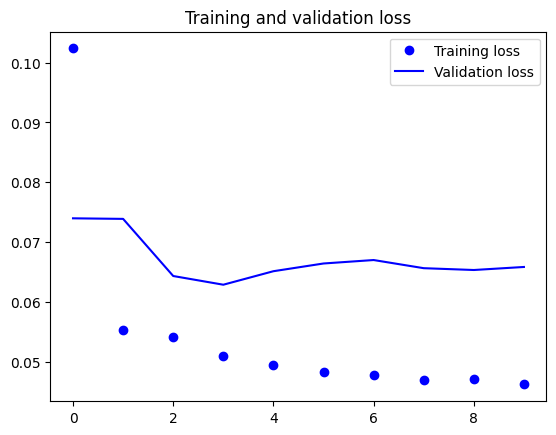

In [20]:
def plot_history(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plot_epochs = range(len(loss))

  plt.figure()

  plt.plot(plot_epochs, loss, 'bo', label='Training loss')
  plt.plot(plot_epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

plot_history(history)

## Camadas Dense

In [21]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2])))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mae")
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 1200, 64)            │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1200, 32)            │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1200, 1)             │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
path_checkpoint = "model_checkpoint_dense.weights.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/10
155/156 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0480
Epoch 1: val_loss improved from inf to 0.06516, saving model to model_checkpoint_dense.weights.h5
156/156 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - loss: 0.0480 - val_loss: 0.0652
Epoch 2/10
154/156 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0473
Epoch 2: val_loss improved from 0.06516 to 0.06449, saving model to model_checkpoint_dense.weights.h5
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0473 - val_loss: 0.0645
Epoch 3/10
155/156 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0471
Epoch 3: val_loss did not improve from 0.06449
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0471 - val_loss: 0.0651
Epoch 4/10
155/156 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0470
Epoch 4: val_loss improved from 0.06449 to 0.06419, saving model to model_checkpoint_dense.weights.h5
156/156 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - loss: 0.0470 - val_loss: 0.0642
Epoch 5/10
155/156 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0469
Epoch

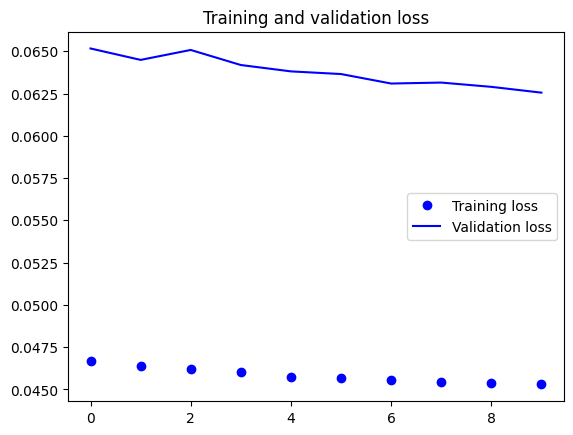

In [26]:
def plot_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plot_epochs = range(len(loss))

    plt.figure()

    plt.plot(plot_epochs, loss, 'bo', label='Training loss')
    plt.plot(plot_epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
plot_history(history)

##Sem earlystop

In [27]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2])))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mae")
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1200, 64)            │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1200, 32)            │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1200, 1)             │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
path_checkpoint = "model_checkpoint_dense.weights.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[modelckpt_callback],
)

Epoch 1/10
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1462
Epoch 1: val_loss improved from inf to 0.06444, saving model to model_checkpoint_dense.weights.h5
156/156 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - loss: 0.1459 - val_loss: 0.0644
Epoch 2/10
155/156 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0621
Epoch 2: val_loss did not improve from 0.06444
156/156 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - loss: 0.0621 - val_loss: 0.0645
Epoch 3/10
154/156 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0568
Epoch 3: val_loss improved from 0.06444 to 0.06106, saving model to model_checkpoint_dense.weights.h5
156/156 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - loss: 0.0568 - val_loss: 0.0611
Epoch 4/10
155/156 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0532
Epoch 4: val_loss did not improve from 0.06106
156/156 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step - loss: 0.0532 - val_loss: 0.0645
Epoch 5/10
155/156 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0525
Epoch 5: val_loss did not improve from 0.06106
156/156 ━━━━

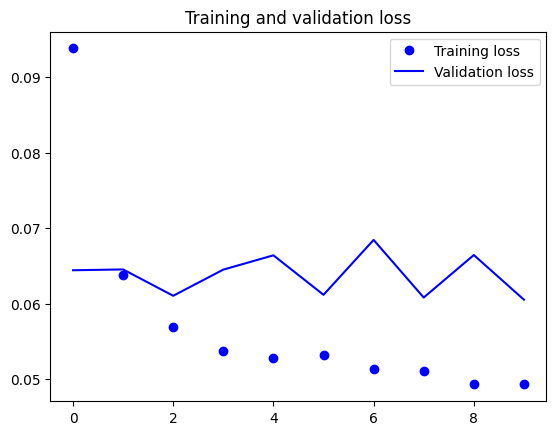

In [29]:
def plot_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plot_epochs = range(len(loss))

    plt.figure()

    plt.plot(plot_epochs, loss, 'bo', label='Training loss')
    plt.plot(plot_epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
plot_history(history)

# Referências

- [Timeseries forecasting for weather prediction](https://keras.io/examples/timeseries/timeseries_weather_forecasting/)